#  LITHIONPOWER

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set() # for plot styling
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

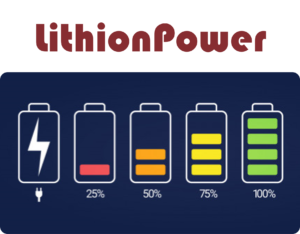

In [15]:
from IPython.display import Image
Image(filename = "C:\\Users\\Rahul Sain\\Documents\\ProjectCrimeDataSet\\LIthion-Power-300x234.png",height=500,width=500)

# Import DataSet

In [6]:
data=pd.read_csv("C:\\Users\\Rahul Sain\\Documents\\Book1.csv")
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [16]:
data.shape

(4000, 3)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [20]:
 data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [36]:
data.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

# Kmeans Clustering algo

In [21]:
from sklearn.cluster import KMeans

#Taking 2 clusters
kmeans = KMeans(n_clusters=2)
df_analyze = data.drop('id',axis=1)
 
kmeans.fit(df_analyze)
 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [23]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [24]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


# Analysis of clustering points

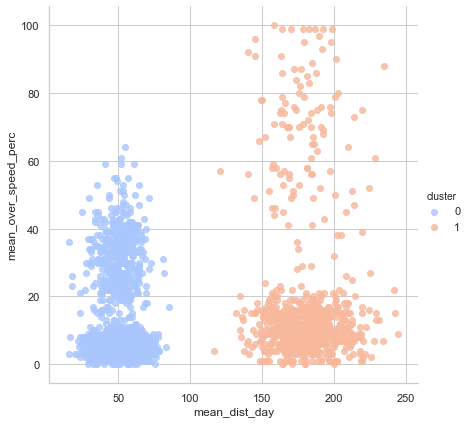

In [26]:
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze, hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

# Check for different cluster values

In [28]:
#Now, Let's check the clusters, when n=4
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(data.drop('id',axis=1))
kmeans_4.fit(data.drop('id',axis=1))
print(kmeans_4.cluster_centers_)
unique, counts = np.unique(kmeans_4.labels_, return_counts=True)
 
kmeans_4.cluster_centers_
print(dict(zip(unique, counts)))

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.40482436  32.36533958]]
{0: 2773, 1: 696, 2: 104, 3: 427}


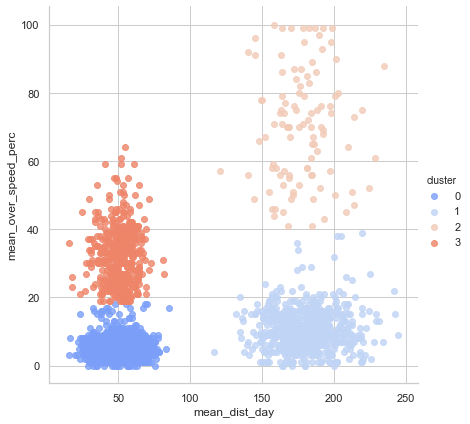

In [30]:
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze, hue='cluster',palette='coolwarm',size=6,aspect=1,fit_reg=False)

# Adding a predocting column ''value"

In [41]:
data['value']=data['mean_over_speed_perc'].apply(lambda x: x>10 )
data.head()

,id,mean_dist_day,mean_over_speed_perc,value
0,3423311935,71.24,28,True
1,3423313212,52.53,25,True
2,3423313724,64.54,27,True
3,3423311373,55.69,22,True
4,3423310999,54.58,25,True


# Finding crossponding boolean values 

In [59]:
lt=list(data.value)
lt2=[]
for i in lt :
    if(i==True) :
        i=1
        lt2.append(i)
    else :
        i=0
        lt2.append(i)

# Add boolean values back to the dataset

In [73]:
data['values'] = np.array(lt2)

In [74]:
data.head()

,id,mean_dist_day,mean_over_speed_perc,value,values
0,3423311935,71.24,28,True,1
1,3423313212,52.53,25,True,1
2,3423313724,64.54,27,True,1
3,3423311373,55.69,22,True,1
4,3423310999,54.58,25,True,1


# Data preprocssing 

In [76]:
data1=data.drop('value',axis=1)
data1.head()

,id,mean_dist_day,mean_over_speed_perc,values
0,3423311935,71.24,28,1
1,3423313212,52.53,25,1
2,3423313724,64.54,27,1
3,3423311373,55.69,22,1
4,3423310999,54.58,25,1


#  Dimension Reduction

In [152]:
X=data1.drop(['values','id'],axis=1)
X.shape

(4000, 2)

In [153]:
y=data1['values']
y.shape

(4000,)

# Data points visualization 

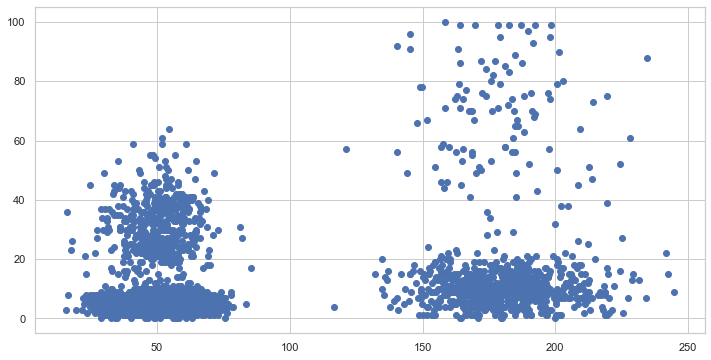

In [154]:
plt.scatter(data['mean_dist_day'],data['mean_over_speed_perc'])

# Train and Test split

In [185]:
from sklearn.model_selection import train_test_split

In [192]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [193]:
len(X_train)

3200

In [194]:
len(X_test)

800

# Logistic Regrssion analysis 

In [195]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [196]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
pred=log.predict(X_test)

# Accuracy in logistic regression

In [198]:
from sklearn.metrics import accuracy_score

In [199]:
log_acc=accuracy_score(pred,y_test)
log_acc

1.0

# Linear Regression analysis

In [200]:
from sklearn.linear_model import LinearRegression
log1 = LinearRegression()

In [182]:
log1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
pred1 = log1.predict(X_test)
pred1 = pred1.astype(int)

# Accuracy in linear regression

In [202]:
log1_acc=accuracy_score(pred1,y_test)
log1_acc

0.75625

In [210]:
acc=[]
acc.append([log_acc,log1_acc])
acc

[[1.0, 0.75625]]